<a href="https://colab.research.google.com/github/abhishek22112001/Ml-finalproject/blob/main/CUSTOMER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishek22112001/Ml-finalproject/refs/heads/main/customer_purchase_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
data.tail()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1
1499,50,0,52625.665974,13,0,25.348017,1,4,1


In [ ]:
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [ ]:
data.duplicated().sum()

112

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
#scale the imputed data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)
print(data_scaled)

           Age    Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
0    -0.254456  0.997122     -0.495070          -0.434443        -1.408161   
1    -1.546283  0.997122     -1.628648          -1.116191        -0.002026   
2    -1.094144  0.997122      1.149081           0.076869        -0.002026   
3    -1.287918  0.997122      1.414947           1.440365         0.701041   
4    -0.835778  0.997122      0.389098           1.440365        -0.705094   
...        ...       ...           ...                ...              ...   
1383 -0.319048  0.997122     -0.523639           0.417743        -1.408161   
1384  1.489510  0.997122     -1.490202           1.269928        -0.002026   
1385 -0.254456  0.997122     -0.728418          -0.604880         1.404109   
1386  1.231144 -1.002886      1.314305           0.929054        -0.002026   
1387  0.391457 -1.002886     -0.854661           0.417743        -1.408161   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  Pur

In [ ]:
data.shape

(1388, 9)

In [ ]:
data['PurchaseStatus'].value_counts()

,count
PurchaseStatus,
0,740
1,648


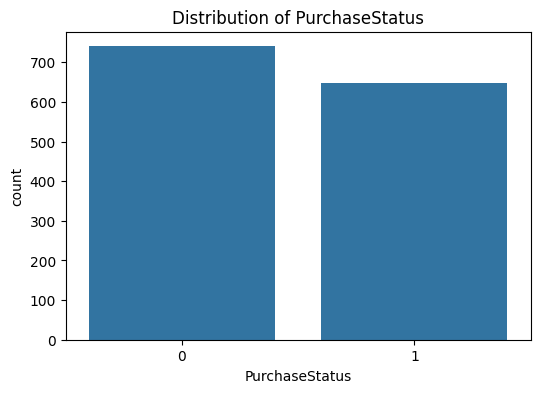

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='PurchaseStatus', data=data)
plt.title('Distribution of PurchaseStatus')
plt.show()

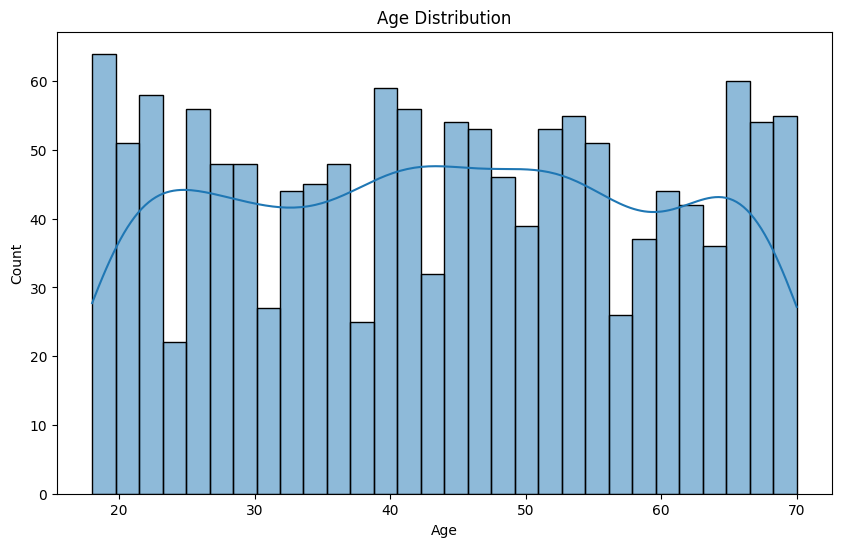

In [ ]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

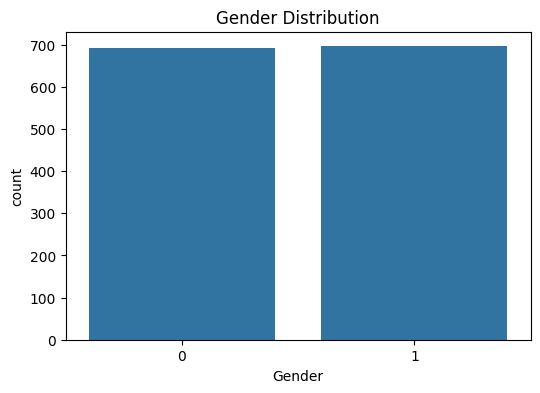

In [ ]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

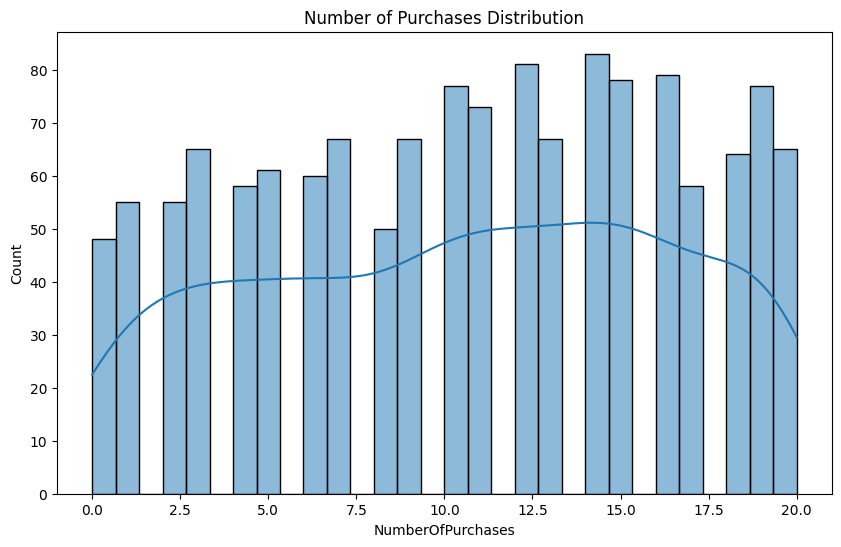

In [ ]:
# Number of Purchases distribution
plt.figure(figsize=(10,6))
sns.histplot(data['NumberOfPurchases'], bins=30, kde=True)
plt.title('Number of Purchases Distribution')
plt.show()

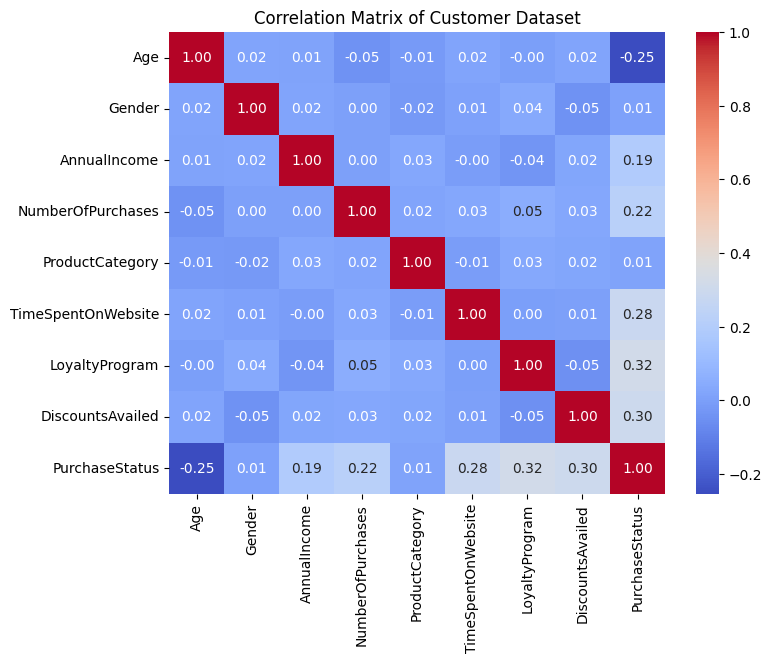

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Customer Dataset')
plt.show()

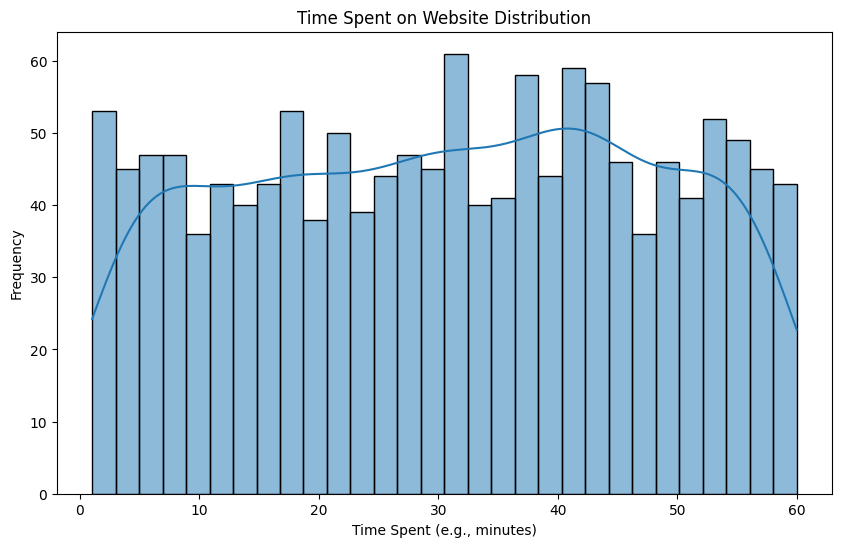

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TimeSpentOnWebsite'], bins=30, kde=True)
plt.title('Time Spent on Website Distribution')
plt.xlabel('Time Spent (e.g., minutes)')
plt.ylabel('Frequency')
plt.show()

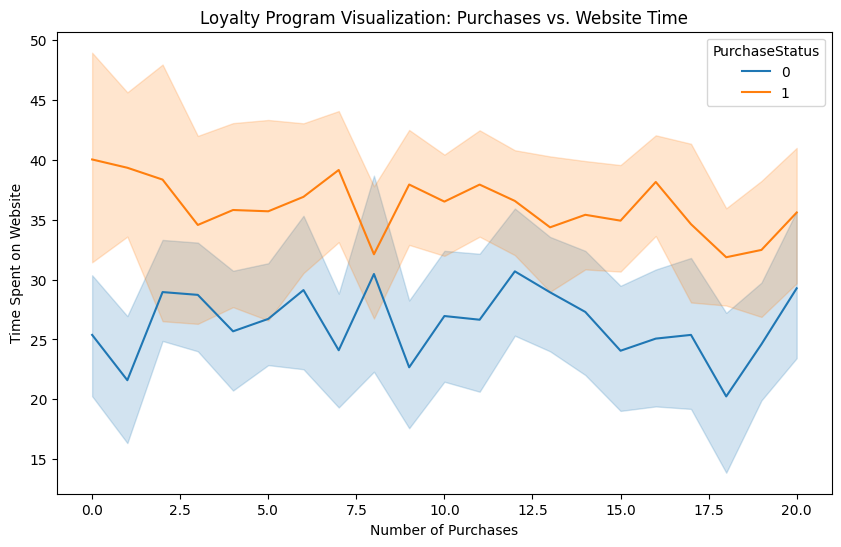

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='NumberOfPurchases', y='TimeSpentOnWebsite', hue='PurchaseStatus', data=data)
plt.title('Loyalty Program Visualization: Purchases vs. Website Time')
plt.xlabel('Number of Purchases')
plt.ylabel('Time Spent on Website')
plt.show()


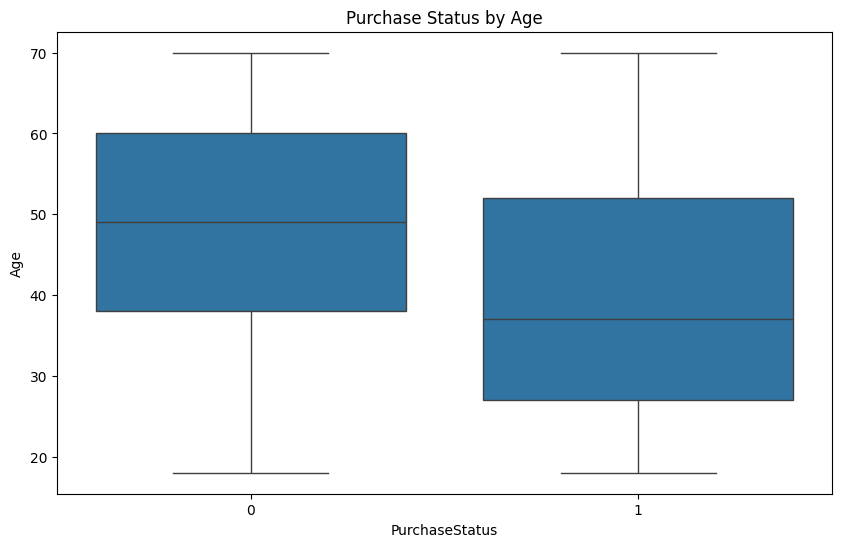

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='PurchaseStatus', y='Age', data=data)
plt.title('Purchase Status by Age')
plt.show()

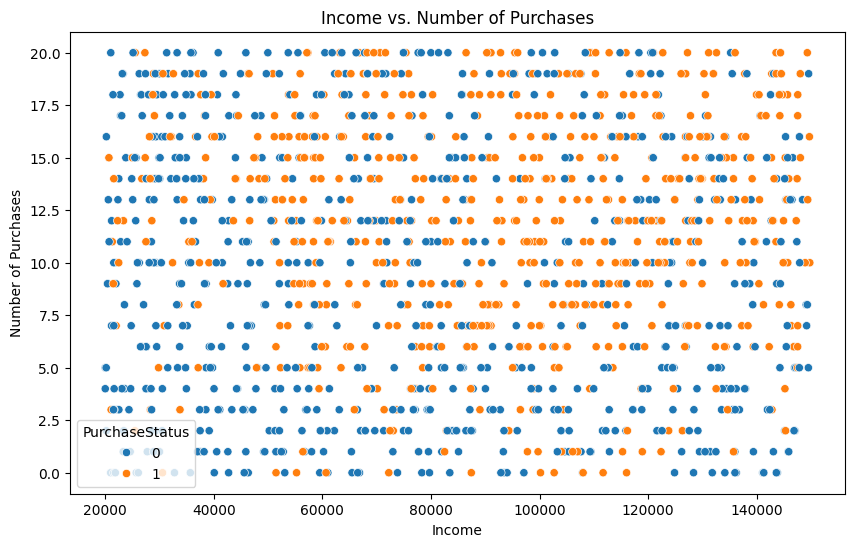

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='NumberOfPurchases', hue='PurchaseStatus', data=data)
plt.title('Income vs. Number of Purchases')
plt.xlabel('Income')
plt.ylabel('Number of Purchases')
plt.show()

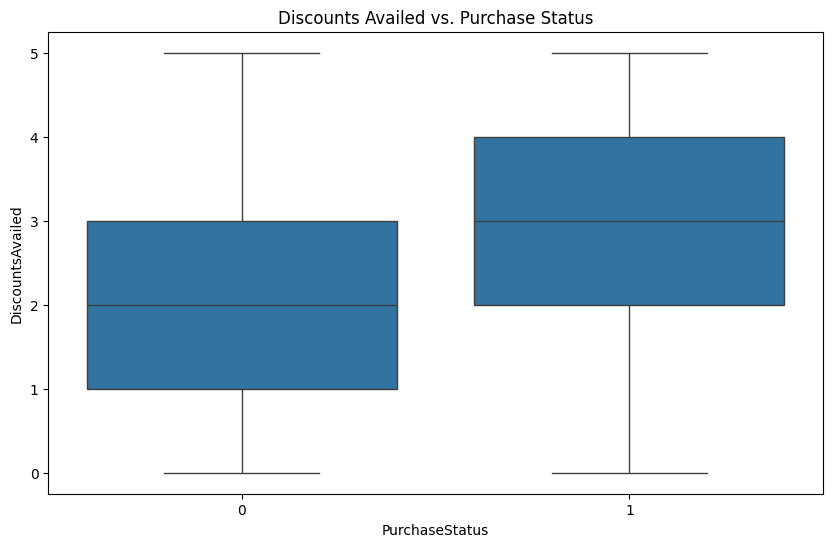

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PurchaseStatus', y='DiscountsAvailed', data=data)
plt.title('Discounts Availed vs. Purchase Status')
plt.show()

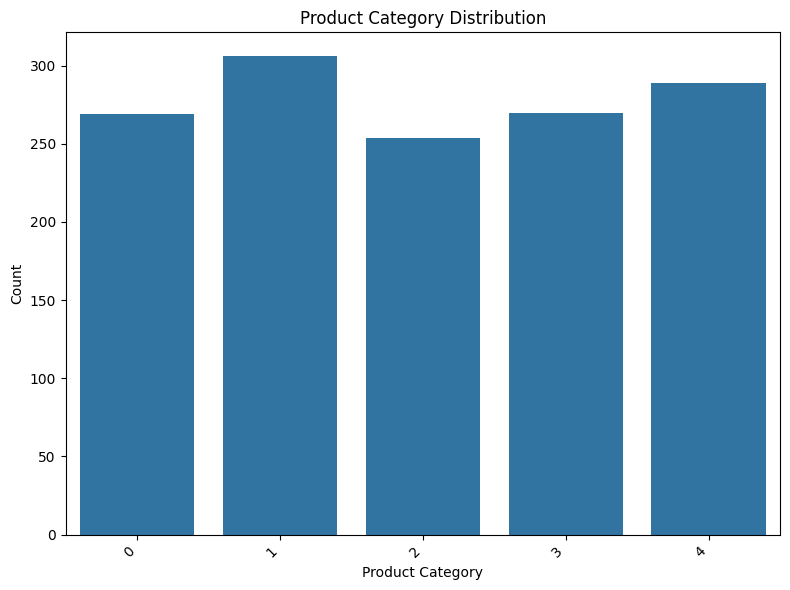

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ProductCategory', data=data)
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

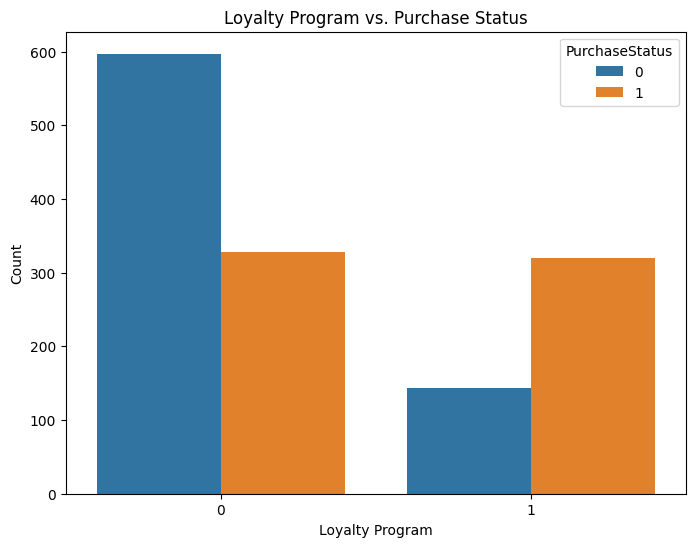

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='LoyaltyProgram', hue='PurchaseStatus', data=data)
plt.title('Loyalty Program vs. Purchase Status')
plt.xlabel('Loyalty Program')
plt.ylabel('Count')
plt.show()

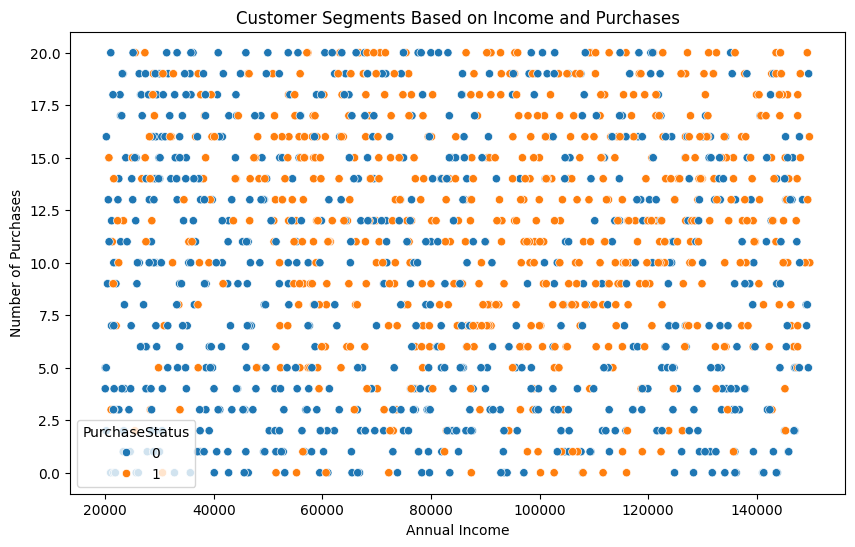

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='NumberOfPurchases', hue='PurchaseStatus', data=data)
plt.title('Customer Segments Based on Income and Purchases')
plt.xlabel('Annual Income')
plt.ylabel('Number of Purchases')
plt.show()

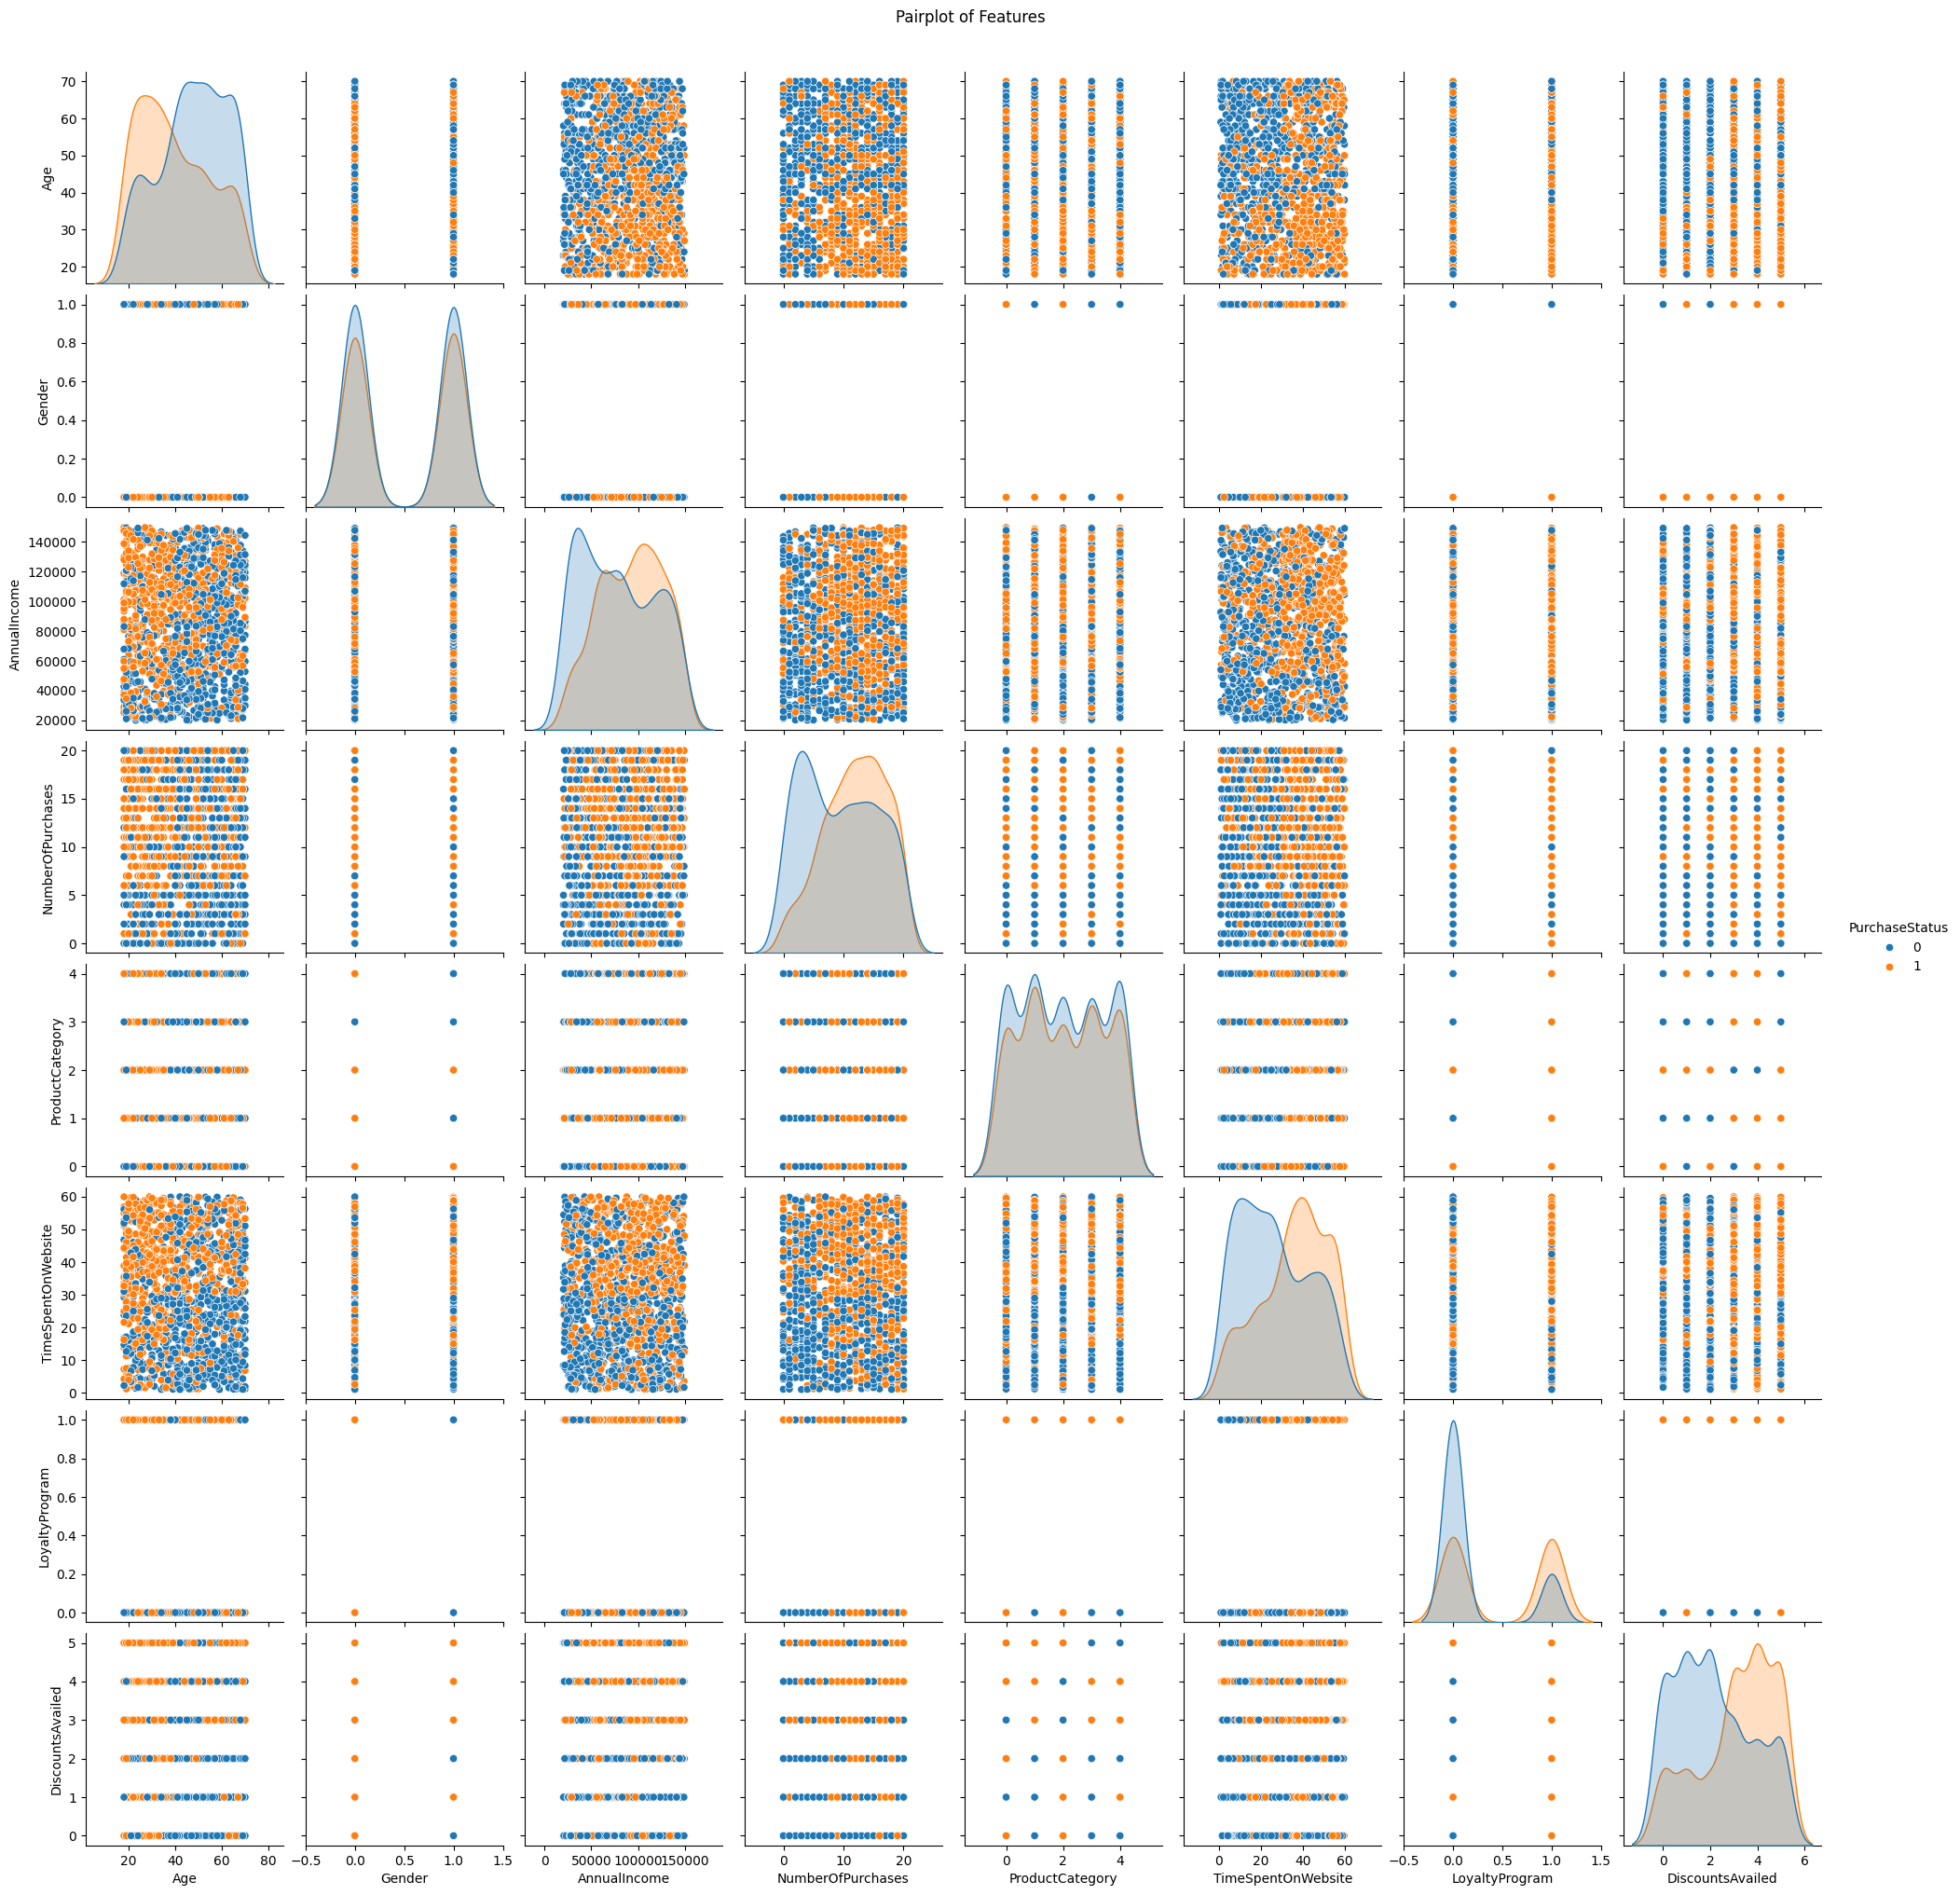

In [ ]:
sns.pairplot(data, hue='PurchaseStatus')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [ ]:
# Split the data
X = data.drop('PurchaseStatus', axis=1)
y = data['PurchaseStatus']

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Decision Tree Classifier:
 Accuracy: 0.8597122302158273
 Precision: 0.8515625
 Recall: 0.8449612403100775
 F1 Score: 0.8482490272373541


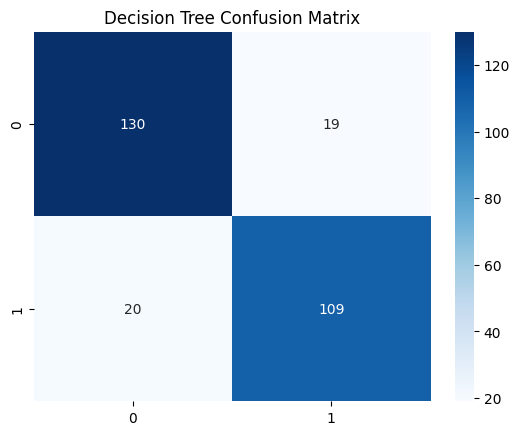

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()


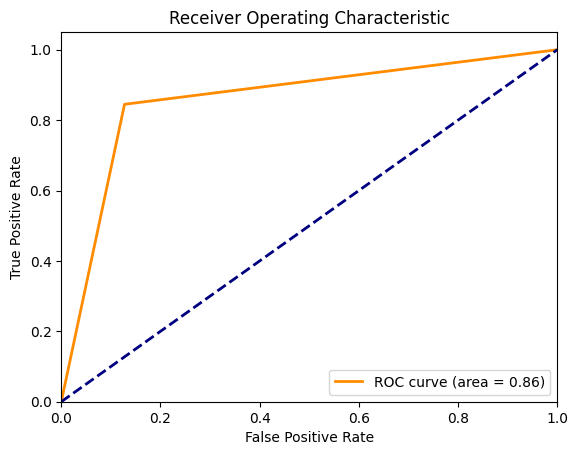

In [ ]:
y_prob_dt = dt_model.predict_proba(x_test)[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

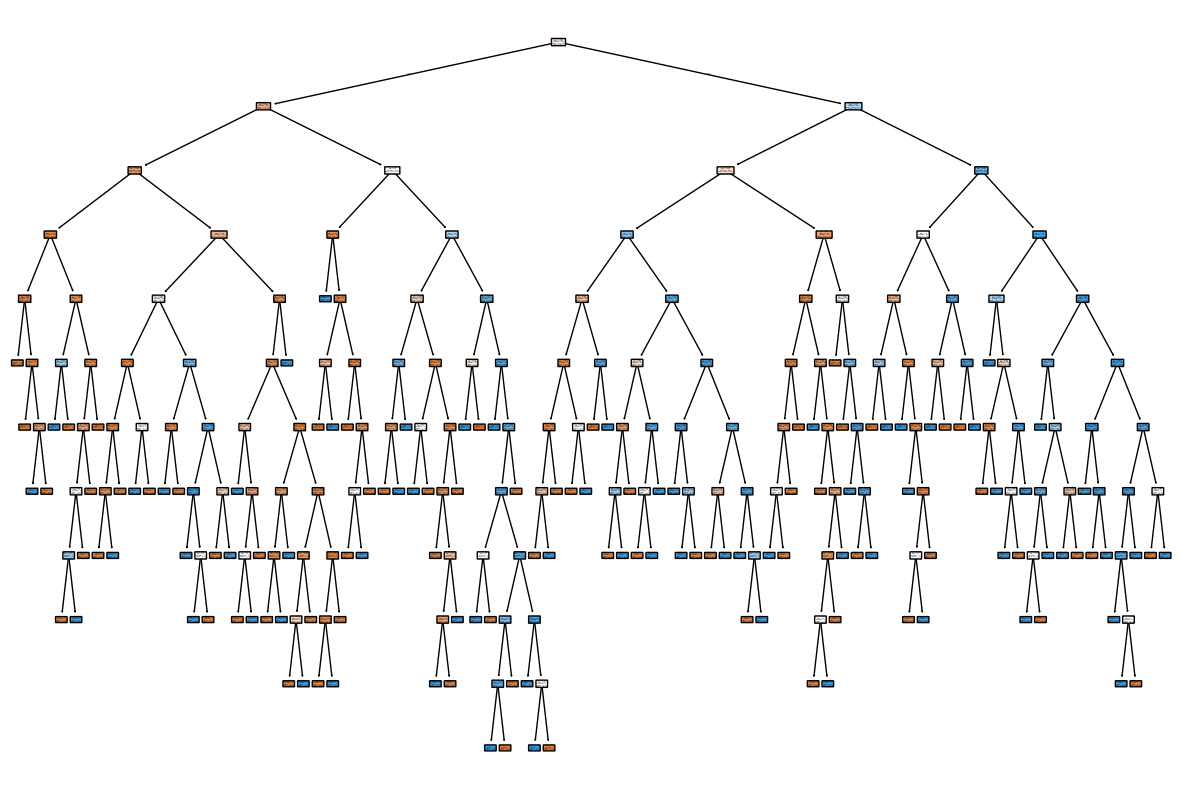

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
plt.show()

Logistic Regression:
 Accuracy: 0.8525179856115108
 Precision: 0.84375
 Recall: 0.8372093023255814
 F1 Score: 0.8404669260700389


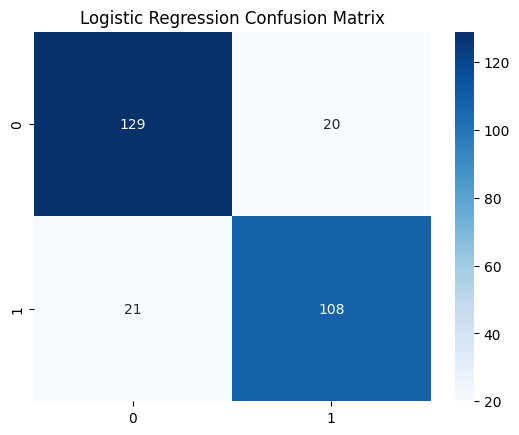

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f'Logistic Regression:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

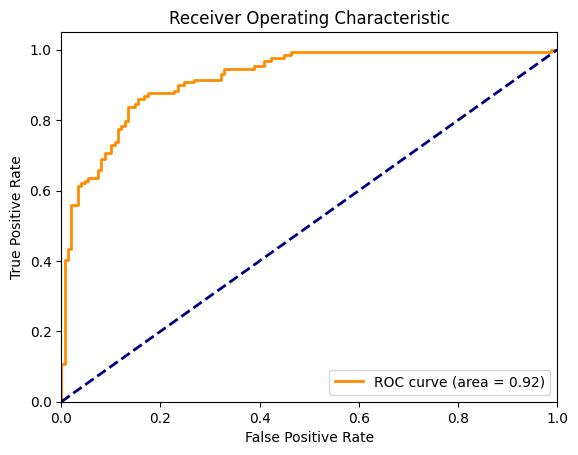

In [ ]:
y_prob_lr = lr_model.predict_proba(x_test)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine:
 Accuracy: 0.8525179856115108
 Precision: 0.8333333333333334
 Recall: 0.8527131782945736
 F1 Score: 0.842911877394636


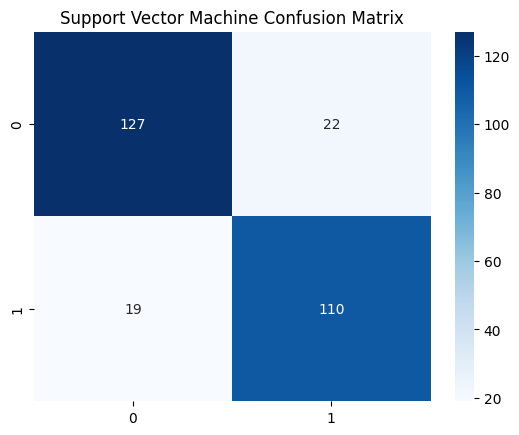

In [ ]:
# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

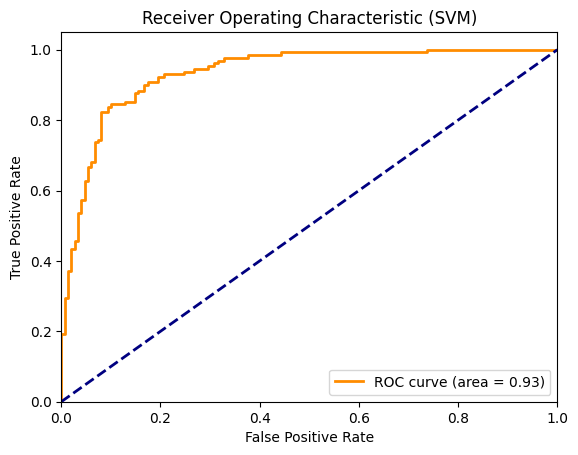

In [ ]:
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

y_prob_svm = svm_model.predict_proba(x_test)[:, 1]

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

Naive Bayes:
 Accuracy: 0.8561151079136691
 Precision: 0.8449612403100775
 Recall: 0.8449612403100775
 F1 Score: 0.8449612403100775


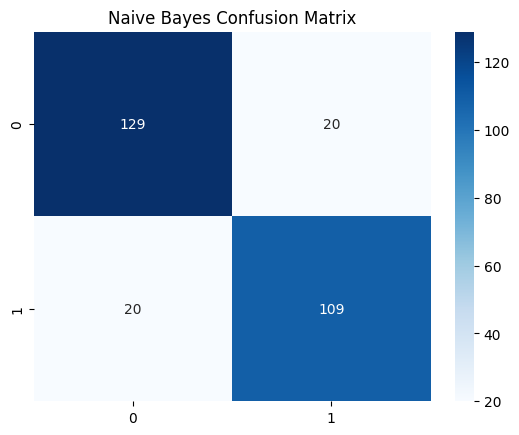

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f'Naive Bayes:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

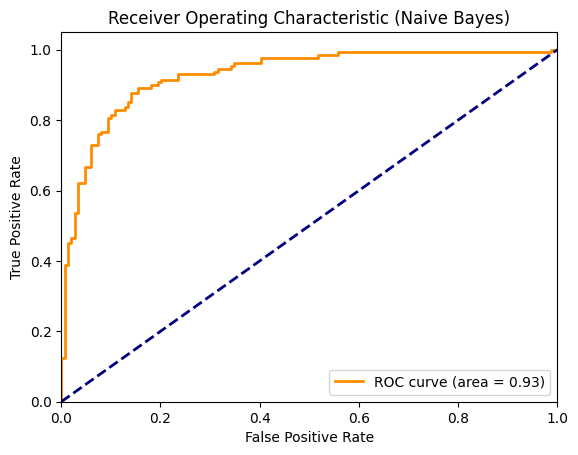

In [ ]:
y_prob_nb = nb_model.predict_proba(x_test)[:, 1]

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

Random Forest:
 Accuracy: 0.935251798561151
 Precision: 0.9512195121951219
 Recall: 0.9069767441860465
 F1 Score: 0.9285714285714286


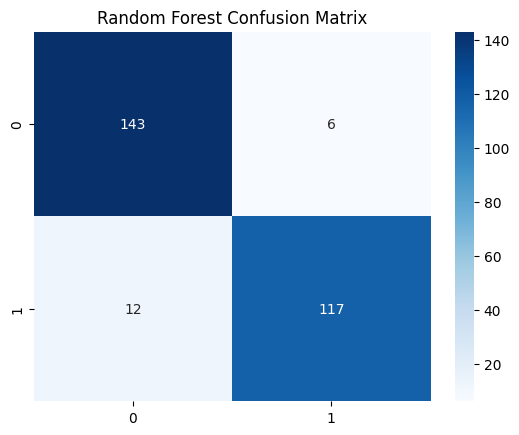

In [ ]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

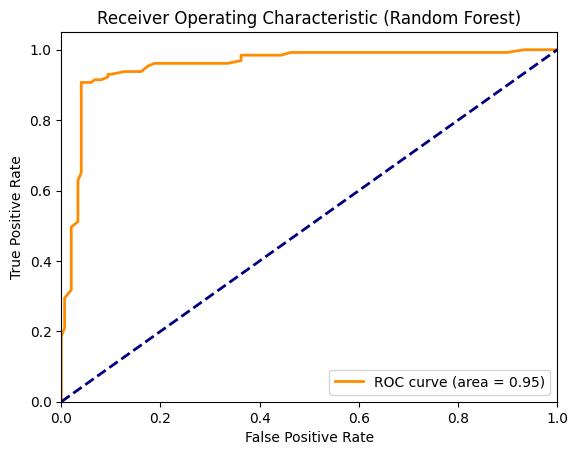

In [ ]:
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

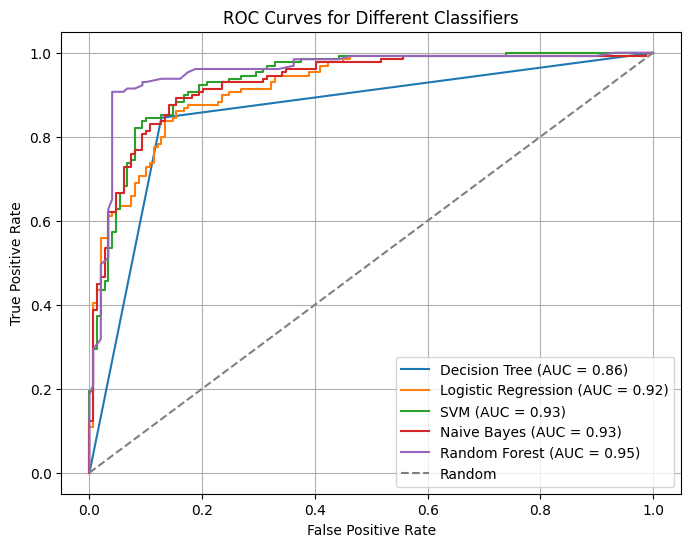

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print("Decision tree: ")
print(classification_report(y_test, y_pred_dt))
print("Logistic Regression: ")
print(classification_report(y_test, y_pred_lr))
print("SVM: ")
print(classification_report(y_test, y_pred_svm))
print("Naive Bayes: ")
print(classification_report(y_test, y_pred_nb))
print("Random Forest: ")
print(classification_report(y_test, y_pred_rf))

Decision tree: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       149
           1       0.85      0.84      0.85       129

    accuracy                           0.86       278
   macro avg       0.86      0.86      0.86       278
weighted avg       0.86      0.86      0.86       278

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       149
           1       0.84      0.84      0.84       129

    accuracy                           0.85       278
   macro avg       0.85      0.85      0.85       278
weighted avg       0.85      0.85      0.85       278

SVM: 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       149
           1       0.83      0.85      0.84       129

    accuracy                           0.85       278
   macro avg       0.85      0.85      0.85       278
weighted avg       0.85      0

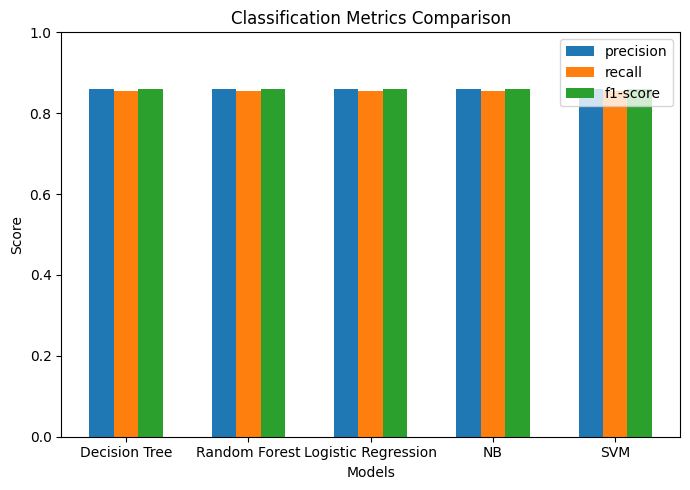

In [ ]:
def extract_metrics(report_str):
    lines = report_str.strip().split('\n')
    metrics = {}
    for line in lines[2:-3]:
        parts = line.split()
        if len(parts) > 0:
          metrics[parts[0]] = {
              'precision': float(parts[1]),
              'recall': float(parts[2]),
              'f1-score': float(parts[3])
          }
    return metrics

models = {
       'Decision Tree': cr,
    'Random Forest': cr,
    'Logistic Regression': cr,
    'NB': cr,
    'SVM': cr
}

metrics_dict = {}
for model_name, report in models.items():
  metrics_dict[model_name] = extract_metrics(report)

plt.figure(figsize=(7, 5))
width = 0.2

x = np.arange(len(models))

for i, metric in enumerate(['precision', 'recall', 'f1-score']):
    values = [np.mean([v[metric] for k,v in metrics_dict[model].items()]) for model in models]
    plt.bar(x + i * width, values, width, label=metric)

plt.xticks(x + width, models.keys())
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Classification Metrics Comparison")
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

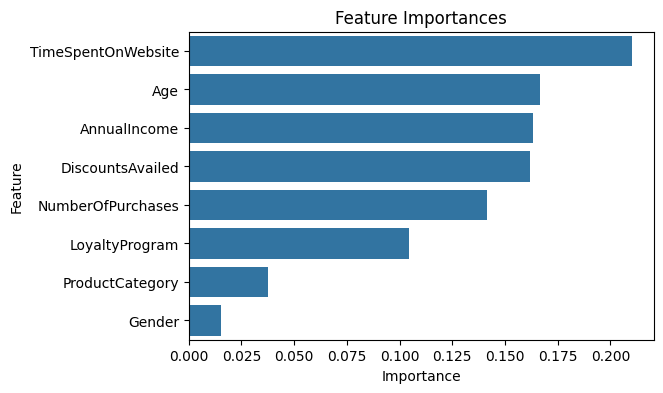

In [ ]:
feature_importances = rf_model.feature_importances_

fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importances')
plt.show()